This notebook requires pillow (a Python Image Library that works well with Python 3).

If you have Anaconda, you can install it with

`conda install pillow`

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from IPython.display import Image as JImage

Load the image into memory

In [2]:
img = Image.open('puppy.jpg')
pix = img.load()

Extract individual pixels as 3-dimensional RGB vectors

In [3]:
rgb_vectors = []
for x in range(img.width):
    for y in range(img.height):
        rgb_vec = pix[x,y]
        rgb_vectors.append(rgb_vec)

Load the RGB values into a DataFrame

In [4]:
df = pd.DataFrame(columns=['r', 'g', 'b'])
df['r'] = [x[0] for x in rgb_vectors]
df['g'] = [x[1] for x in rgb_vectors]
df['b'] = [x[2] for x in rgb_vectors]

Try different *k* values

In [7]:
k_values = [3, 5, 8, 12, 16]

for i in range(len(k_values)):
    k = k_values[i]
    # run clustering
    print("Running clustering for k=%d" % k)
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(df)
    df['cluster'] = clusters
    # create K colours to represent the image
    colours = []
    for _ in range(k):
        colours.append((np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255)))
    # create a new image file
    new_img = Image.new('RGB', (img.width, img.height))
    img_data = new_img.load()
    counter = 0
    for x in range(img.width):
        for y in range(img.height):
            # get cluster index from DF
            cluster = df.loc[counter,'cluster']
            # get associated colour
            cluster_colour = colours[cluster]
            # add coloured pixel to new image
            img_data[x,y] = cluster_colour
            counter += 1
    new_img_name = 'puppy_{}.jpg'.format(k)
    new_img.save(new_img_name)
print('Done!')

Running clustering for k=3
Running clustering for k=5
Running clustering for k=8
Running clustering for k=12
Running clustering for k=16


The moral of the story is: even 3 colours can draw a puppy!

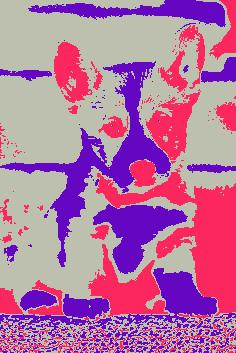

In [8]:
JImage('puppy_3.jpg')